# Traccion de una malla

La tracción uniaxial se resuelve utilizando un programa escrito en Fortran (https://github.com/khawabonga/Nanofibrous_Mesh_Processor) el cual lee una malla intersectada y simplificada y resuelve el equilibrio del RVE para la deformación uniaxial. La configuración para este solver está dada en el archivo 'ConfigurationFile.txt' y se puede leer en el repositorio la documentación de cómo utilizarlo.
Como resultado se guardan en el directorio varios archivos de mallas deformadas y un archivo con la curva constitutiva con la tensión homogeneizada.

In [9]:
# Paquetes
import sys 
sys.path.insert(0, '/home/dancab/git/dcVirtualSpinning')
import VirtualSpinning as vs
import os 
from matplotlib import pyplot as plt
import numpy as np

Pregraficando Mallasim
   0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 


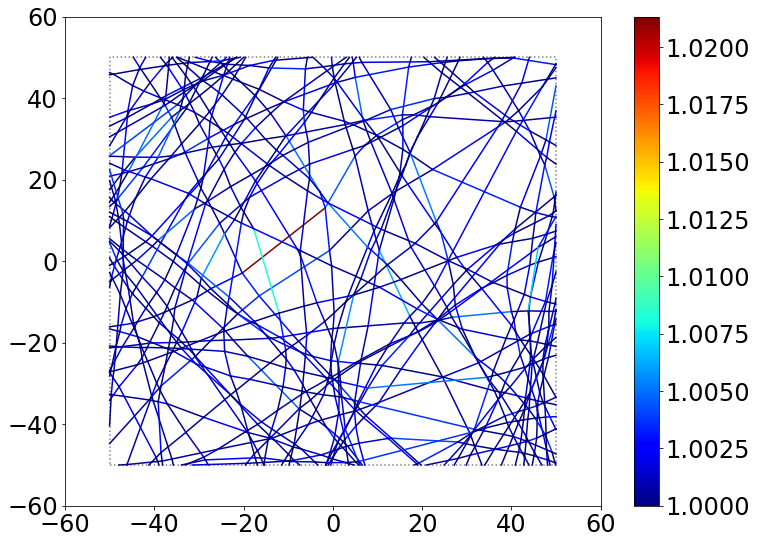

In [3]:
# Primero graficamos la malla inicial sin deformar
carpeta = os.path.abspath('')
archivo = os.path.join(carpeta, 'malla_i_s.txt')
m0 = vs.Mallasim.leer_de_archivo(archivo)
fig, ax = plt.subplots(figsize=(12,9))
m0.pre_graficar_bordes(fig, ax)
m0.pre_graficar(fig, ax, cby='lamr')

Pregraficando Mallasim
   0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 
Pregraficando Mallasim
   0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 
Pregraficando Mallasim
   0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 
Pregraficando Mallasim
   0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 
Pregraficando Mallasim
   0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 
Pregraficando Mallasim
   0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 
Pregraficando Mallasim
   0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 
Pregraficando Mallasim
   0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 
Pregraficando Mallasim
   0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 


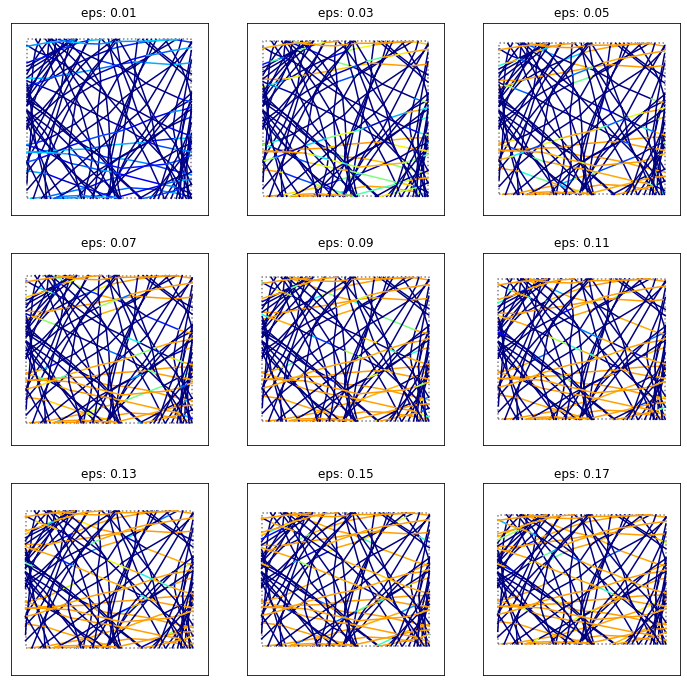

In [21]:
# Luego veamos algunas deformadas
nums = range(2,18+1,2)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
axs = axs.flatten()
for i, num in enumerate(nums):
    archivo = os.path.join(carpeta, f'malla_i_s_uaxi_{num:04d}.txt')
    ax = axs[i]
    m = vs.Mallasim.leer_de_archivo(archivo)
    m.pre_graficar_bordes(fig, ax)
    m.pre_graficar(fig, ax, cby='lam_ef', cvmin=1., cvmax=1.03, cbar=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'eps: {m.Fmacro[0,0]-1.:.2f}')

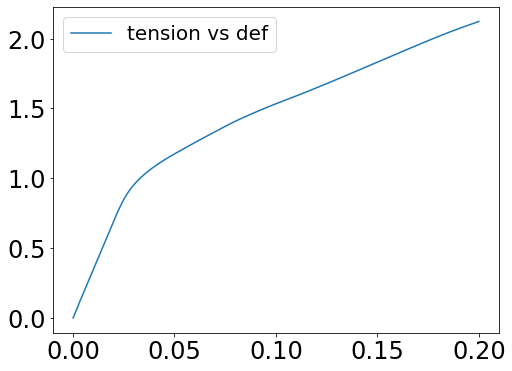

In [24]:
# Tambien podemos ver la curva constitutiva que conseguimos:
archivo = os.path.join(carpeta, 'malla_c.txt')
with open(archivo, 'r') as f:
    e11, e22, t11, t22 = [], [], [], []
    for line in f:
        vals = [float(val) for val in line.split()]
        e11.append(vals[0] - 1.)
        e22.append(vals[3] - 1.)
        t11.append(vals[4])
        t22.append(vals[7])
# Graficar
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(e11, t11, label='tension vs def')
ax.legend()

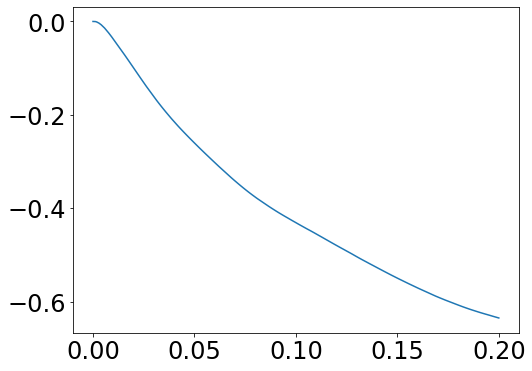

In [25]:
# Y podemos graficar la deformacion transversal vs deformacion axial 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(e11, e22)